# Welcome to Jupyter!

Modèle SIR

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.integrate
from scipy.optimize import fsolve

\begin{cases}
\displaystyle
\frac{dS(t)}{dt} &=& -\beta S(t)I(t)&(1.1)\\
\displaystyle
\frac{dI(t)}{dt} &=& \beta S(t)I(t)-\gamma I(t)&(1.2)\\
\displaystyle
\frac{dR(t)}{dt} &=& \gamma I(t)&(1.3)
\end{cases}

In [2]:
N = 100 #Population total
T=100 #Temps total
#Conditions initiales
I0, R0 = 0.4, 0.1
S0 = N - I0 - R0
#Variables 
beta=0.02 #Taux de contamination
gamma = 0.1  #Taux de guérisson
t=[i*T/N for i in range(N+1)]


# The SIR model differential equations.
def f(y,t):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Nous avons initialisé notre fonction f. 
Cette fonction résout le système d'équations différentiels du modèle SIR. 

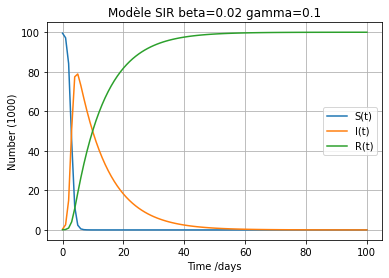

In [3]:
y0 = [S0, I0, R0]
sol=scipy.integrate.odeint(f,y0,t)

plt.plot(t,sol)
plt.xlabel('Time /days')
plt.ylabel('Number (1000)')
plt.grid()
plt.legend(['S(t)','I(t)','R(t)'])
plt.title('Modèle SIR beta={} gamma={}'.format(beta,gamma))
plt.show()
pc =fsolve(f,y0,t)

Sur le graphique, nous pouvons observer que l'infection se propagera à l'entièreté de la population puis disparaitra.

On sais que la matrice Jacobienne est sous la forme comme:

$$J_f(\bar{u})=\begin{pmatrix}
\frac{\partial f_1}{\partial S}(\bar{S},\bar{I},\bar{R}) & \frac{\partial f_1}{\partial I}(\bar{S},\bar{I},\bar{R}) &\frac{\partial f_1}{\partial R}(\bar{S},\bar{I},\bar{R})\\ 
\frac{\partial f_2}{\partial S}(\bar{S},\bar{I},\bar{R}) & \frac{\partial f_2}{\partial I}(\bar{S},\bar{I},\bar{R}) &\frac{\partial f_2}{\partial R}(\bar{S},\bar{I},\bar{R})\\ 
\frac{\partial f_3}{\partial S}(\bar{S},\bar{I},\bar{R}) &\frac{\partial f_3}{\partial I}(\bar{S},\bar{I},\bar{R}) &\frac{\partial f_3}{\partial R}(\bar{S},\bar{I},\bar{R})\\ 
\end{pmatrix}$$

Voici la matrice Jacobienne que nous obtenons.

$$=\begin{pmatrix}
-\beta \bar{I} & -\beta \bar{S} & 0\\ 
\beta \bar{I} & \beta \bar{S}-\gamma & 0\\ 
0 & \gamma & 0\\
\end{pmatrix}$$

Le premier cas :$$\bar{S}=1.0\quad\bar{I}=0.0\quad\bar{R}=0.0$$
(Il n'y a pas de personne infectée)

In [4]:
y0=[1,0,0]
sol_valeur=fsolve(f,y0,t)
print('S,I,R =',sol_valeur)

S,I,R = [1. 0. 0.]


In [5]:
Jf=[[0,-beta,0],[0,beta-gamma,0],[0,gamma,0]]
Jf=np.array(Jf)
S=np.linalg.eig(Jf)
print(type(S))
print('Les valeurs propres de la matrice Jacobienne sont \n',S[0])

<class 'tuple'>
Les valeurs propres de la matrice Jacobienne sont 
 [ 0.    0.   -0.08]


Les valeurs propres de la matrice Jacobienne sont toutes négatives, donc la fonction est stable.

Le deuxième cas :$$\bar{S}=0.0\quad\bar{I}=1.0\quad \bar{R}=0.0$$

In [6]:
y0=[0.0,1.0,0.0]
sol_valeur=fsolve(f,y0, t)
print('S,I,R=',sol_valeur)

S,I,R= [2.43515636e-39 1.44890865e-70 0.00000000e+00]


$$J_f=\begin{pmatrix}
0 & 0  & 0\\ 
0 & -\gamma  & 0\\ 
0 & \gamma & 0
\end{pmatrix}$$

In [7]:
Jf=[[0,0,0],[0,-gamma,0],[0,gamma,0]]
Jf=np.array(Jf)
S=np.linalg.eig(Jf)
print(type(S))
print('Les valeurs propres de la matrice Jacobienne sont \n',S[0])

<class 'tuple'>
Les valeurs propres de la matrice Jacobienne sont 
 [ 0.   0.  -0.1]


Les valeurs propres de la matrice Jacobienne sont toutes négatives, donc la fonction est stable.

Le troisième cas :$$\bar{S}=0.5\quad\bar{I}=0.5\quad\bar{R}=0.0 
$$

In [8]:
y0=[0.5,0.5,0.0]
sol_valeur=fsolve(f,y0,t)
print('S,I,R =',sol_valeur)

S,I,R = [5.98500667e+00 1.95951849e-19 2.92314741e+01]


$$J_f=\begin{pmatrix}
0 & -0.5\beta  & 0\\ 
0 & 0.5\beta -\gamma  & 0\\ 
0 & \gamma & 0
\end{pmatrix}$$

In [9]:
Jf=[[0,-0.5*beta,0],[0,0.5*beta-gamma,0],[0,gamma,0]]
Jf=np.array(Jf)
S=np.linalg.eig(Jf)
print(type(S))
print('Les valeurs propres de la matrice Jacobienne sont \n',S[0])

<class 'tuple'>
Les valeurs propres de la matrice Jacobienne sont 
 [ 0.    0.   -0.09]


Les valeurs propres de la matrice Jacobienne sont toutes négatives, donc la fonction est stable.